In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1: Dataset exploration
understanding the data set, import libraries and load the dataset

In [2]:
# Define root directory paths
file_path = "../../combined_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15858929 entries, 0 to 15858928
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject     object
 1   activity    object
 2   trial       object
 3   x_ADXL345   int64 
 4   y_ADXL345   int64 
 5   z_ADXL345   int64 
 6   x_ITG3200   int64 
 7   y_ITG3200   int64 
 8   z_ITG3200   int64 
 9   x_MMA8451Q  int64 
 10  y_MMA8451Q  int64 
 11  z_MMA8451Q  int64 
dtypes: int64(9), object(3)
memory usage: 1.4+ GB


In [4]:
# Display the first few rows
df.head()

subject activity trial  x_ADXL345  y_ADXL345  z_ADXL345  x_ITG3200  \
0    SA01      D01   R01         17       -179        -99        -18   
1    SA01      D01   R01         15       -174        -90        -53   
2    SA01      D01   R01          1       -176        -81        -84   
3    SA01      D01   R01        -10       -180        -77       -104   
4    SA01      D01   R01        -21       -191        -63       -128   

   y_ITG3200  z_ITG3200  x_MMA8451Q  y_MMA8451Q  z_MMA8451Q  
0       -504       -352          76        -697        -279  
1       -568       -306          48        -675        -254  
2       -613       -271          -2        -668        -221  
3       -647       -227         -34        -697        -175  
4       -675       -191         -74        -741        -133

In [5]:
# No. of rows and columns in the dataset
df.shape

(15858929, 12)

In [6]:
# Statistical measures of columns in the dataset
df.describe()

x_ADXL345     y_ADXL345     z_ADXL345     x_ITG3200     y_ITG3200  \
count  1.585893e+07  1.585893e+07  1.585893e+07  1.585893e+07  1.585893e+07   
mean  -1.237190e+00 -1.787412e+02 -2.772492e+01 -9.714189e+00  3.517304e+01   
std    1.050061e+02  1.499351e+02  1.248853e+02  5.908545e+02  4.895010e+02   
min   -4.096000e+03 -4.096000e+03 -4.096000e+03 -3.230300e+04 -1.549100e+04   
25%   -2.200000e+01 -2.530000e+02 -9.200000e+01 -7.600000e+01 -1.800000e+01   
50%    2.000000e+00 -2.300000e+02 -3.100000e+01 -1.100000e+01  3.800000e+01   
75%    2.600000e+01 -5.400000e+01  3.300000e+01  6.500000e+01  9.400000e+01   
max    4.094000e+03  4.092000e+03  4.091000e+03  3.276700e+04  1.581900e+04   

          z_ITG3200    x_MMA8451Q    y_MMA8451Q    z_MMA8451Q  
count  1.585893e+07  1.585893e+07  1.585893e+07  1.585893e+07  
mean  -4.465375e+00 -1.889273e+01 -7.005180e+02 -5.936869e+01  
std    3.981378e+02  4.086284e+02  5.827475e+02  5.061164e+02  
min   -1.315000e+04 -8.192000e+03 -8.192000e+03 -8.192000e+03  
25%   -3.300000e+01 -9.700000e+01 -9.900000e+02 -3.170000e+02  
50%   -5.000000e+00  1.000000e+00 -9.050000e+02 -6.800000e+01  
75%    2.300000e+01  8.200000e+01 -2.090000e+02  1.850000e+02  
max    1.379800e+04  8.191000e+03  8.191000e+03  8.191000e+03

In [7]:
# Check for missing values in the entire dataset
missing_values = df.isnull().sum()

missing_values

subject       0
activity      0
trial         0
x_ADXL345     0
y_ADXL345     0
z_ADXL345     0
x_ITG3200     0
y_ITG3200     0
z_ITG3200     0
x_MMA8451Q    0
y_MMA8451Q    0
z_MMA8451Q    0
dtype: int64

In [8]:
# Finding out the no. or subjects, activities and trials that has been carried out
print("Unique subjects:", df.subject.nunique())
print("Unique activities:", df.activity.nunique())
print("Unique trials:", df.trial.nunique())
# No of activities per trials vary.
# Some activities have only one trials, but some activities have upto 5 trials.

Unique subjects: 38
Unique activities: 34
Unique trials: 6


In the dataset descriptions it says that all activities are recorded only upto 5 trials (uptp R05) but here it says there are R06 also. 

To understand where this happens, rows with R06 should be checked deep.

In [9]:
df.trial.unique()

array(['R01', 'R02', 'R03', 'R04', 'R05', 'R06'], dtype=object)

In [10]:
df[df['trial'] == 'R06'].head(2)

subject activity trial  x_ADXL345  y_ADXL345  z_ADXL345  x_ITG3200  \
15517542    SE14      D07   R06         -8       -239        -94        -59   
15517543    SE14      D07   R06         -5       -242       -102        -60   

          y_ITG3200  z_ITG3200  x_MMA8451Q  y_MMA8451Q  z_MMA8451Q  
15517542         42         -5         -44        -927        -305  
15517543         45         -8         -41        -933        -304

In [11]:
# Filter the data for subject 'SE14' and activity 'D07'
se14_d07_data = df[(df['subject'] == 'SE14') & (df['activity'] == 'D07')]

# Get unique combinations of subject, activity, and trial
unique_combinations = se14_d07_data[['subject', 'activity', 'trial']].drop_duplicates()

unique_combinations

subject activity trial
15507943    SE14      D07   R01
15510342    SE14      D07   R02
15512742    SE14      D07   R03
15515142    SE14      D07   R05
15517542    SE14      D07   R06

It can be seen that in the SE14's D07 activity recording, a mistake have been made, where they have names R04 as R05 and R05 as R06. They have skipped R04. 

Solution - Renaming R05 as R04 and R06 as R05

In [12]:
# Filter the data for subject 'SE14' and activity 'D07'
se14_d07_data = df[(df['subject'] == 'SE14') & (df['activity'] == 'D07')]

# Rename R05 as R04 and R06 as R05 in the trial column using .loc
df.loc[(df['subject'] == 'SE14') & (df['activity'] == 'D07'), 'trial'] = df.loc[(df['subject'] == 'SE14') & (df['activity'] == 'D07'), 'trial'].replace({'R05': 'R04', 'R06': 'R05'})

# Verify the changes
df[['subject', 'activity', 'trial']].drop_duplicates()

subject activity trial
0           SA01      D01   R01
19999       SA01      D02   R01
39999       SA01      D03   R01
59999       SA01      D04   R01
79999       SA01      D05   R01
...          ...      ...   ...
15821931    SE15      D16   R01
15824330    SE15      D16   R02
15826730    SE15      D16   R03
15829130    SE15      D16   R04
15831530    SE15      D16   R05

[4500 rows x 3 columns]

In [13]:
# Creating a new column for label based on the activity performed
df['label'] = df['activity'].apply(lambda x: 1 if x[0] == 'F' else 0)
# label= 1 (Fall)
# label= 0 (Non Fall)

In [14]:
# Group the DataFrame by subject, activity and trial
grouped = df.groupby(['subject', 'activity', 'trial'])

In [15]:
len(grouped)

4500

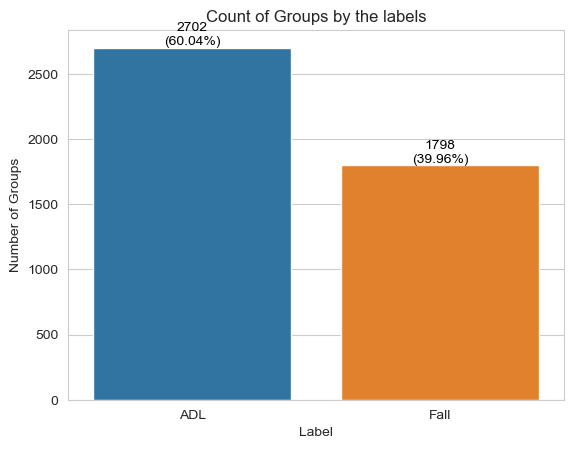

In [16]:
# Computing the mean of each group
grouped_mean = grouped.mean()

# Calculate class times and percentages
class_counts = grouped_mean['label'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Check the class distribution
ax = sns.countplot(x='label', data=grouped_mean)

# Add annotations for counts and percentages
for p, count, perc in zip(ax.patches, class_counts, class_percentages):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}\n({perc:.2f}%)', xy=(x, y), ha='center', va='bottom', fontsize=10, color='black')


# Set labels and title for better readability
plt.xlabel('Label')
plt.ylabel('Number of Groups')
plt.title('Count of Groups by the labels')
plt.xticks([0, 1], ['ADL', 'Fall'])  # Labeling 0 as ADL and 1 as Fall
plt.show()


- The dataset is imbalanced, with a higher proportion of non-fall groups compared to fall groups.
- The class imbalance will need to be addressed during the modeling stage (e.g., resampling, weighted loss) to ensure the model does not favor the majority class (non-falls).

Reason for Imbalance: 

The imbalance in the dataset arises because elderly participants predominantly performed Activities of Daily Living (ADLs) and avoided simulated falls due to medical conditions and physician recommendations.

As stated in the dataset description:

Elderly people between 60 and 75 years old only simulated ADLs, except for one participant (SE06) who is an expert in Judo and performed fall simulations.
Certain activities (e.g., D06, D13, D18, D19) were not performed by elderly subjects due to:
Medical recommendations from a physician specializing in sports.
Personal impairments or medical conditions.
This results in a higher number of non-fall activities (ADLs) compared to fall simulations, leading to the observed class imbalance.


In [17]:
# No. of groups
grouped.size()

subject  activity  trial
SA01     D01       R01      19999
         D02       R01      20000
         D03       R01      20000
         D04       R01      20000
         D05       R01       5000
                            ...  
SE15     D17       R01       9999
                   R02      10000
                   R03      10000
                   R04      10000
                   R05      10000
Length: 4500, dtype: int64

```
Activities of Daily Living (ADL):
 
+-----+------------------------------------------------------------------------------------+------+--------+
| Code| Activity                                                                           |Trials|Duration|
+-----+------------------------------------------------------------------------------------+------+--------+
| D01 | Walking slowly                                                                     | 1    | 100s   |
| D02 | Walking quickly                                                                    | 1    | 100s   |
| D03 | Jogging slowly                                                                     | 1    | 100s   |
| D04 | Jogging quickly                                                                    | 1    | 100s   |
| D05 | Walking upstairs and downstairs slowly                                             | 5    | 25s    |
| D06 | Walking upstairs and downstairs quickly                                            | 5    | 25s    |
| D07 | Slowly sit in a half height chair, wait a moment, and up slowly                    | 5    | 12s    |
| D08 | Quickly sit in a half height chair, wait a moment, and up quickly                  | 5    | 12s    |
| D09 | Slowly sit in a low height chair, wait a moment, and up slowly                     | 5    | 12s    |
| D10 | Quickly sit in a low height chair, wait a moment, and up quickly                   | 5    | 12s    |
| D11 | Sitting a moment, trying to get up, and collapse into a chair                      | 5    | 12s    |
| D12 | Sitting a moment, lying slowly, wait a moment, and sit again                       | 5    | 12s    |
| D13 | Sitting a moment, lying quickly, wait a moment, and sit again                      | 5    | 12s    |
| D14 | Being on one's back change to lateral position,wait a moment, change to one's back | 5    | 12s    |
| D15 | Standing, slowly bending at knees, and getting up                                  | 5    | 12s    |
| D16 | Standing, slowly bending without bending knees, and getting up                     | 5    | 12s    |
| D17 | Standing, get into a car, remain seated and get out of the car                     | 5    | 25s    |
| D18 | Stumble while walking                                                              | 5    | 12s    |
| D19 | Gently jump without falling (trying to reach a high object)                        | 5    | 12s    |
+-----+------------------------------------------------------------------------------------+------+--------+

Falls:

+-----+------------------------------------------------------------------------------------+------+--------+
| Code| Activity                                                                           |Trials|Duration|
+-----+------------------------------------------------------------------------------------+------+--------+
| F01 | Fall forward while walking caused by a slip                                        | 5    | 15s    |
| F02 | Fall backward while walking caused by a slip                                       | 5    | 15s    |
| F03 | Lateral fall while walking caused by a slip                                        | 5    | 15s    |
| F04 | Fall forward while walking caused by a trip                                        | 5    | 15s    |
| F05 | Fall forward while jogging caused by a trip                                        | 5    | 15s    |
| F06 | Vertical fall while walking caused by fainting                                     | 5    | 15s    |
| F07 | Fall while walking, with use of hands in a table to dampen fall, caused by fainting| 5    | 15s    |
| F08 | Fall forward when trying to get up                                                 | 5    | 15s    |
| F09 | Lateral fall when trying to get up                                                 | 5    | 15s    |
| F10 | Fall forward when trying to sit down                                               | 5    | 15s    |
| F11 | Fall backward when trying to sit down                                              | 5    | 15s    |
| F12 | Lateral fall when trying to sit down                                               | 5    | 15s    |
| F13 | Fall forward while sitting, caused by fainting or falling asleep                   | 5    | 15s    |
| F14 | Fall backward while sitting, caused by fainting or falling asleep                  | 5    | 15s    |
| F15 | Lateral fall while sitting, caused by fainting or falling asleep                   | 5    | 15s    |
+-----+------------------------------------------------------------------------------------+------+--------+

```

#### Ensure all groups have consistent time series lengths
According to the above description, it can be seen that different activities have different lengths in time. 
- Activities D01 - D04 are recorded for 100s, which includes 20000 data rows, (200 per second)
- Activities D05, D06 and D17 are recorded for 25 seconds and have 500 data rows per sample
- ALl the Falls are recorded for 15 seconds and have 3000 data rows per sample
- All other activities are of 12 seconds only, which has only 2400 rows

If the time series lengths of groups are inconsistent, several issues can arise, particularly during modeling and preprocessing:
- Models like LSTMs and CNNs require inputs with fixed dimensions. 
- Impact on feature engineering - challenging to directly feed the data into the models.
- When aggregating group data (e.g., computing means or sums), inconsistent lengths can bias the statistics. Shorter groups will have fewer data, leading to incorrect averages.

Solution the groups of long sequences will be truncated.

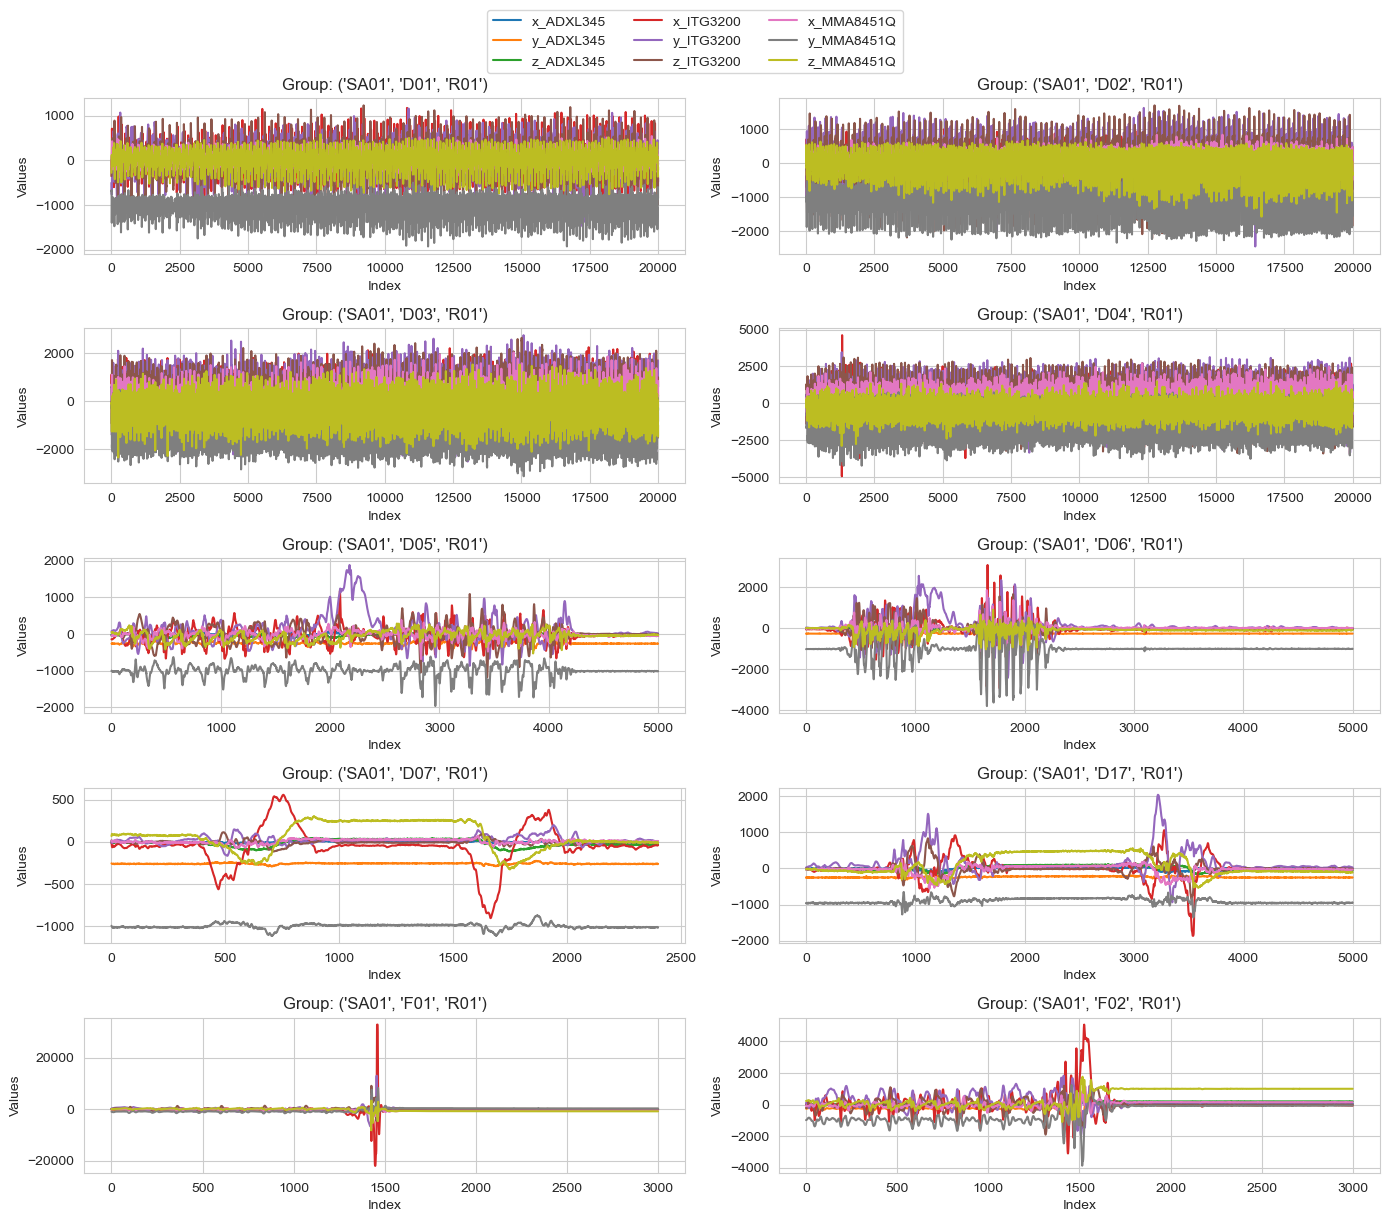

In [18]:
# To have an idea of what does data from long sequences look like one sample from each case will be printed out.

# Define the specific activities you want to plot
selected_activities = ["D01", "D02", "D03", "D04", "D05", "D06", "D07", "D17", "F01", "F02"]

# Create a list to hold one group from each activity
groups_to_plot = []

# Iterate over selected activities and pick the first matching group for each activity
for activity in selected_activities:
    for group_key in grouped.groups.keys():
        if activity in group_key:
            groups_to_plot.append(group_key)
            break  # Break after finding the first matching group for the activity

# Ensure we have only 8 groups
groups_to_plot = groups_to_plot[:10]

# Create subplots: 8 plots in a grid of 4 rows × 2 columns
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.flatten()  # Flatten axes for easier access

# Initialize a variable to capture the legend handles and labels
handles, labels = None, None

# Plot each selected group
for i, group_key in enumerate(groups_to_plot):
    # Extract the group's data
    group_data = grouped.get_group(group_key)
    
    # Reset the index so x-values start from 0
    group_data_reset = group_data.reset_index(drop=True)
    
    # Drop identifiers and plot the remaining sensor data
    ax = axes[i]
    plot = group_data_reset.drop(['subject', 'activity', 'trial', 'label'], axis=1, errors='ignore').plot(
        ax=ax, title=f"Group: {group_key}", legend=False  # Only capture the legend once
    )
    
    # Capture the legend handles and labels (from the first plot)
    if handles is None and labels is None:
        handles, labels = ax.get_legend_handles_labels()

    ax.set_xlabel("Index")
    ax.set_ylabel("Values")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a single legend outside the plot grid
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit the legend
plt.show()


In the above figure the groups with long sequences is plotted. 
- D01 (100s - 20 000)
- D02 (100s - 20 000)
- D03 (100s - 20 000)
- D04 (100s - 20 000)
- D05 (25s - 5000)
- D06 (25s - 5000)
- D07 (12s - 2400) // lowest sequence
- D17 (25s - 5000)

**Data Trimming for Fall Detection Analysis**

During the analysis of the sensor data, it became clear that when the data was limited to 12 seconds, the patterns were much more distinct and visible. In contrast, when the data contained a longer duration (in the 100s), the patterns were less visible, and it became challenging to interpret the underlying behavior. Additionally, in these longer time frames, the patterns appeared to be more recursive, making it harder to pinpoint the specific actions.

To make the patterns clearer and to ensure consistent analysis across different activities, I will apply the following trimming strategy:

Trimming Strategy:
- For Activities D01, D02, D03, D04: Trim to the middle 12 seconds of the data.
- For Activity D05: Trim to the middle 12 seconds.
- For Activity D06: Trim to the first 12 seconds of the data.
- For Activity D17: Trim to the middle 12 seconds.
- For All Fall Activities (15 seconds): Trim to the first 12 seconds of the data.

Reasoning Behind Trimming:
- Fall activities are only 15 seconds long, and for consistency, I will keep only the first 12 seconds for all fall-related data. 
- For non-fall activities with variable durations, I chose specific trimming methods to retain the most meaningful part of the data based on the activity duration and sensor patterns.

This trimming step ensures that all data used in the analysis are of uniform length (12 seconds) and can be fairly compared without discrepancies due to varying event durations.

In [46]:
grouped.size().unique()

array([19999, 20000,  5000,  2400,  4999,  3000,  2999,  2399,  3001,
        3006,  5005,  2982,  2981,  4981,  5001,  2998,  2996,  2398,
        2395,  2997, 19997,  4998,  2394,  2396,  2891, 35999, 36000,
        2401,  2001,  1999,  2000,  5406,  4605,  5008,  4205,  4603,
        3204,  3205,  3607, 20001, 22006,  4606,  5011,  4806,  4206,
        3807,  4006,  5007,  3404,  3405,  3804,  2404, 19995, 19985,
       19998, 19996,  4993,  4997, 19990,  9999, 10000], dtype=int64)

According to the dataset description it says the least time an activity was recorded was 12 seconds (which should mean that the minimum size of these groups should be 2400) But for some reason some groups have different sizes

In [40]:
# Define the activities that need the middle 12 seconds
selected_activities_first = ["D01", "D02", "D03", "D04", "D05", "D17"]

# Define the activities that need the first 12 seconds
selected_activities_second = ["D07", "D08", "D09", "D10", "D11", "D12", "D13", "D14", 
                              "D15", "D16", "D18", "D19", "D06", "F01", "F02", "F03", 
                              "F04", "F05", "F06", "F07", "F08", "F09", "F10", "F11", 
                              "F12", "F13", "F14", "F15"]

# Create an empty list to store the filtered data for these groups
filtered_groups_first = []
filtered_groups_second = []

# Iterate over each group in 'grouped' for first set of activities
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities for the first set (middle 12 seconds)
    if any(activity in group_key for activity in selected_activities_first):
        total_rows = len(group_data)
        
        # Calculate the number of rows to trim based on the total row count
        rows_to_trim = (total_rows - 2400) // 2  # Keep 2400 rows in the middle
        
        # Trim the rows dynamically, for both even and odd row counts
        middle_12_seconds = group_data.iloc[rows_to_trim:-rows_to_trim]
        
        # Check if the number of rows is 2401 (i.e., odd number), remove the last row if necessary
        if len(middle_12_seconds) > 2400:
            middle_12_seconds = middle_12_seconds.iloc[:2400]  # Remove the last row
        
        # Append the trimmed group to the list
        filtered_groups_first.append(middle_12_seconds)

# Iterate over each group in 'grouped' for second set of activities
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities for the second set (first 12 seconds)
    if any(activity in group_key for activity in selected_activities_second):
        # Trim to keep the first 12 seconds
        first_12_seconds = group_data.iloc[:2400]
        
        # Append the trimmed group to the list
        filtered_groups_second.append(first_12_seconds)

# Concatenate the filtered groups from both sets of activities into one DataFrame
trimmed_df = pd.concat(filtered_groups_first + filtered_groups_second)

# Group the data by subject, activity, and trial
trimmed_groups = trimmed_df.groupby(['subject', 'activity', 'trial'])

# Print the size of each group after trimming to verify
print(trimmed_groups.size())

subject  activity  trial
SA01     D01       R01      2400
         D02       R01      2400
         D03       R01      2400
         D04       R01      2400
         D05       R01      2400
                            ... 
SE15     D17       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
Length: 4500, dtype: int64


In [41]:
trimmed_groups.size().unique()

array([2400, 2399, 2398, 2395, 2394, 2396, 2001, 1999, 2000], dtype=int64)

In [42]:
# Define the activities that need the middle 12 seconds
selected_activities = ["D01", "D02", "D03", "D04", "D05", "D17"]

# Create an empty list to store the filtered data for these groups
filtered_groups = []

# Iterate over each group in 'grouped'
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities
    if any(activity in group_key for activity in selected_activities):
        total_rows = len(group_data)
        
        # Calculate the number of rows to trim based on the total row count
        rows_to_trim = (total_rows - 2400) // 2  # Keep 2400 rows in the middle
        
        # Trim the rows dynamically, for both even and odd row counts
        middle_12_seconds = group_data.iloc[rows_to_trim:-rows_to_trim]
        
        # Check if the number of rows is 2401 (i.e., odd number), remove the last row if necessary
        if len(middle_12_seconds) == 2401:
            middle_12_seconds = middle_12_seconds.iloc[:-1]  # Remove the last row

        # Append the trimmed group to the list
        filtered_groups.append(middle_12_seconds)

# Concatenate the filtered groups back into a single DataFrame
filtered_df = pd.concat(filtered_groups)

# Group the data by subject, activity, and trial
filtered_groups = filtered_df.groupby(['subject', 'activity', 'trial'])

# Print the size of each group after trimming
print(filtered_groups.size())

KeyboardInterrupt: 

In [33]:
# Define the activities that need the middle 12 seconds
selected_activities = ["D06", "F01", "F02", "F03", "F04", "F05", "F06", "F07", "F08", "F09", "F10", "F11", "F12", "F13", "F14", "F15"]

# Create an empty list to store the filtered data for these groups
filtered_groups = []

# Iterate over each group in 'grouped'
for group_key, group_data in grouped:
    # Check if the activity is one of the selected activities
    if any(activity in group_key for activity in selected_activities):
        # Trim to keep the first 12 seconds
        first_12_seconds = group_data.iloc[:2400]
        
        # Append the trimmed group to the list
        filtered_groups.append(first_12_seconds)

# Concatenate the filtered groups back into a single DataFrame
filtered_df = pd.concat(filtered_groups)

# Group the data by subject, activity, and trial
filtered_groups = filtered_df.groupby(['subject', 'activity', 'trial'])

# Print the size of each group after trimming
print(filtered_groups.size())

subject  activity  trial
SA01     D06       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
                            ... 
SE06     F15       R01      2400
                   R02      2400
                   R03      2400
                   R04      2400
                   R05      2400
Length: 1916, dtype: int64


#### Check for Outliers

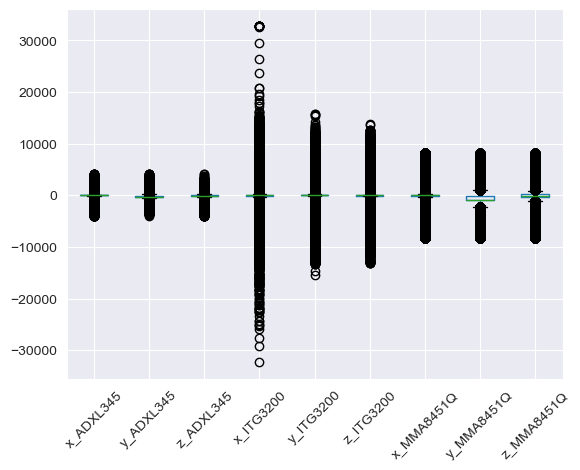

In [6]:
df.boxplot()

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

In [7]:
print(df.subject.nunique())
print(df.activity.nunique())
print(df.trial.nunique())

print(sum(df['activity'].str.startswith("F")))
print(sum(df['activity'].str.startswith("D")))
df.shape

38
34
6
5393714
10465215


(15858929, 12)

In [8]:
df['result'] = df['activity'].apply(lambda x: 1 if x[0] == 'F' else 0)
df.head(2)

subject activity trial  x_ADXL345  y_ADXL345  z_ADXL345  x_ITG3200  \
0    SA01      D01   R01         17       -179        -99        -18   
1    SA01      D01   R01         15       -174        -90        -53   

   y_ITG3200  z_ITG3200  x_MMA8451Q  y_MMA8451Q  z_MMA8451Q  result  
0       -504       -352          76        -697        -279       0  
1       -568       -306          48        -675        -254       0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15858929 entries, 0 to 15858928
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject     object
 1   activity    object
 2   trial       object
 3   x_ADXL345   int64 
 4   y_ADXL345   int64 
 5   z_ADXL345   int64 
 6   x_ITG3200   int64 
 7   y_ITG3200   int64 
 8   z_ITG3200   int64 
 9   x_MMA8451Q  int64 
 10  y_MMA8451Q  int64 
 11  z_MMA8451Q  int64 
 12  result      int64 
dtypes: int64(10), object(3)
memory usage: 1.5+ GB


In [10]:
# Group the DataFrame by subject, activity, trial, and result
grouped = df.groupby(['subject', 'activity', 'trial'])
print(grouped.size())

subject  activity  trial
SA01     D01       R01      19999
         D02       R01      20000
         D03       R01      20000
         D04       R01      20000
         D05       R01       5000
                            ...  
SE15     D17       R01       9999
                   R02      10000
                   R03      10000
                   R04      10000
                   R05      10000
Length: 4500, dtype: int64


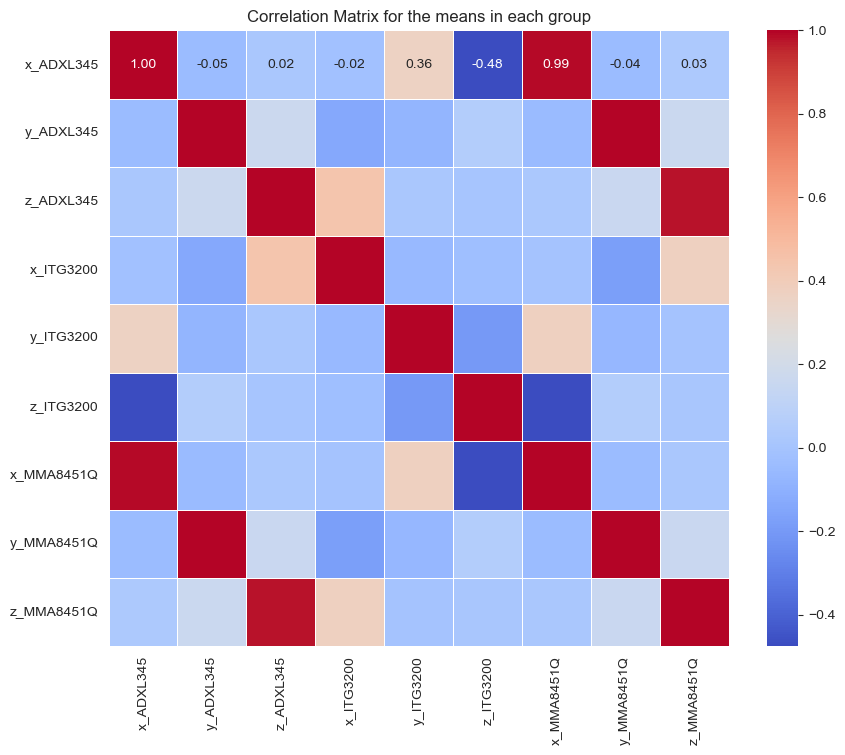

In [12]:
# Aggregating the groups, here we take the mean for each group
grouped_mean = grouped.mean()

# Select the first 5 groups (or rows) after aggregation
first_5_groups = grouped_mean

# Calculate the correlation matrix for the first 5 groups
correlation_matrix = first_5_groups[['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q']].corr()

# Plotting the correlation matrix for the first 5 groups
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for the means in each group')
plt.show()

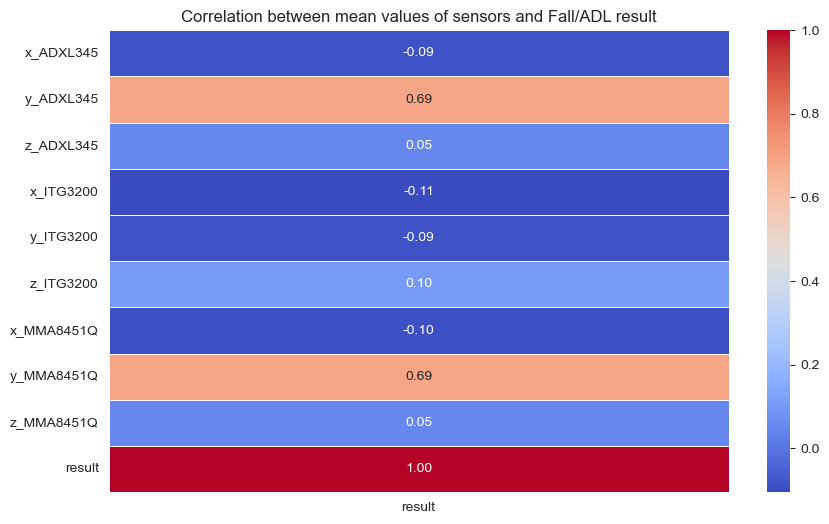

In [13]:
# Correlation matrix with result included
correlation_with_result = grouped_mean[['x_ADXL345', 'y_ADXL345', 'z_ADXL345', 'x_ITG3200', 'y_ITG3200', 'z_ITG3200', 'x_MMA8451Q', 'y_MMA8451Q', 'z_MMA8451Q', 'result']].corr()

# Plotting correlation between sensors and result
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_result[['result']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between mean values of sensors and Fall/ADL result')
plt.show()


#### Convert the three axes of each sensor into a single vector

Calculate the magnitude (or norm) of the 3D vector formed by combining the x, y, and z components for each sensor. \
Gives single value that represents the overall magnitude of the sensor's reading at each point in time.

##### Formula to Calculate the Magnitude (or Norm):
For each sensor axis, calculate the magnitude as follows:

\[
\text{Magnitude} = \sqrt{x^2 + y^2 + z^2}
\]

Where:
- \(x\), \(y\), and \(z\) are the sensor readings along the respective axes.



In [14]:
# Calculate the magnitude for each sensor and store them in new columns
df['ADXL345_magnitude'] = np.sqrt(df['x_ADXL345']**2 + df['y_ADXL345']**2 + df['z_ADXL345']**2)
df['ITG3200_magnitude'] = np.sqrt(df['x_ITG3200']**2 + df['y_ITG3200']**2 + df['z_ITG3200']**2)
df['MMA8451Q_magnitude'] = np.sqrt(df['x_MMA8451Q']**2 + df['y_MMA8451Q']**2 + df['z_MMA8451Q']**2)

In [15]:
# Create a new DataFrame containing only the selected columns
df_mag = df[['subject', 'activity', 'trial', 'result', 
             'ADXL345_magnitude', 'ITG3200_magnitude', 'MMA8451Q_magnitude']]

# Check the result
df_mag.head()

subject activity trial  result  ADXL345_magnitude  ITG3200_magnitude  \
0    SA01      D01   R01       0         205.258374         615.015447   
1    SA01      D01   R01       0         196.471372         647.355389   
2    SA01      D01   R01       0         193.747258         675.474648   
3    SA01      D01   R01       0         196.033160         693.508471   
4    SA01      D01   R01       0         202.215232         713.084848   

   MMA8451Q_magnitude  
0          754.603207  
1          722.803569  
2          703.611398  
3          719.437280  
4          756.469431

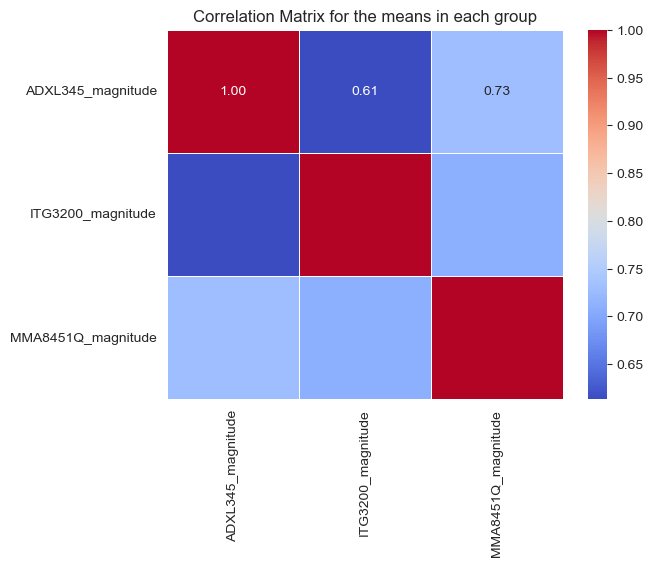

In [16]:
# Group the DataFrame by subject, activity, trial, and result
grouped_mag = df_mag.groupby(['subject', 'activity', 'trial'])

# Calculate the correlation matrix for the first 5 groups
correlation_matrix = grouped_mag.mean()[['ADXL345_magnitude', 'ITG3200_magnitude', 'MMA8451Q_magnitude']].corr()

# Plotting the correlation matrix for the first 5 groups
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for the means in each group')
plt.show()

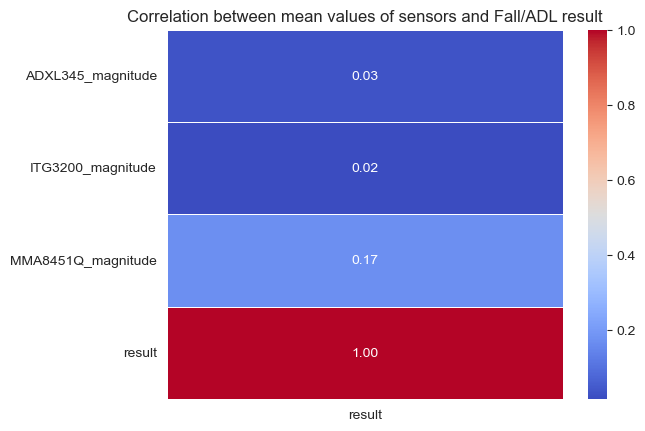

In [17]:
# Correlation matrix with result included
correlation_with_result = grouped_mag.mean()[['ADXL345_magnitude', 'ITG3200_magnitude', 'MMA8451Q_magnitude', 'result']].corr()

# Plotting correlation between sensors and result
plt.figure()
sns.heatmap(correlation_with_result[['result']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between mean values of sensors and Fall/ADL result')
plt.show()

In [18]:
def display_time_series_10(grouped__, legend):
    # Get the first 10 groups
    groups = list(grouped__.groups.keys())[-10:]
    # groups = list(grouped__.groups.keys())[:10]
    
    # Plot each group
    fig, axes = plt.subplots(5, 2, figsize=(9, 12))  # Adjust grid size based on the number of plots
    axes = axes.flatten()

    for i, group_key in enumerate(groups):
        # Extract the group's data
        group_data = grouped__.get_group(group_key)

        # Plot all columns except for the group identifiers
        group_data.drop(['subject', 'activity', 'trial'], axis=1, errors='ignore').plot(
            ax=axes[i], title=f"Group: {group_key}", legend=legend
        )
        axes[i].set_xlabel("Index")
        axes[i].set_ylabel("Values")

    # Adjust layout
    plt.tight_layout()
    plt.show()

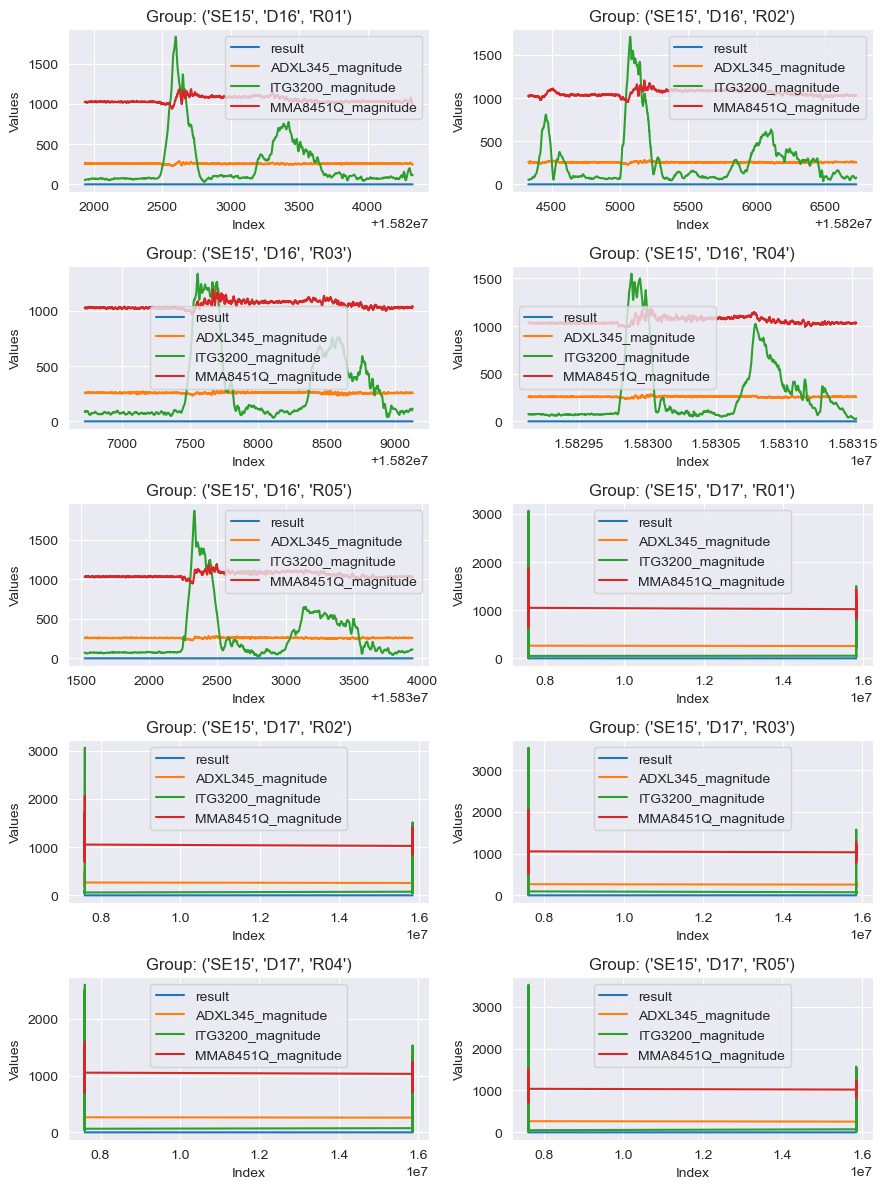

In [19]:
display_time_series_10(grouped_mag, True)

In [20]:
from sklearn.decomposition import PCA

# Perform PCA on the axes of a sensor
def perform_pca(df, sensor_prefix):
    # Extract the relevant columns for the sensor
    sensor_columns = [f"{axis}_{sensor_prefix}" for axis in ['x', 'y', 'z']]
    
    # Check if columns exist
    if all(col in df.columns for col in sensor_columns):
        # Perform PCA
        pca = PCA(n_components=1)
        pca_result = pca.fit_transform(df[sensor_columns])
        # Return the first principal component as a Series
        return pca_result.flatten()
    else:
        raise ValueError(f"Columns for sensor {sensor_prefix} not found in DataFrame.")

# Add the first principal component of each sensor to the DataFrame
df['ADXL345_pca'] = perform_pca(df, 'ADXL345')
df['ITG3200_pca'] = perform_pca(df, 'ITG3200')
df['MMA8451Q_pca'] = perform_pca(df, 'MMA8451Q')

# Create a new DataFrame containing only the PCA results
df_pca = df[['subject', 'activity', 'trial', 'result', 'ADXL345_pca', 'ITG3200_pca', 'MMA8451Q_pca']]

# Check the resulting DataFrame
df_pca.head()


subject activity trial  result  ADXL345_pca  ITG3200_pca  MMA8451Q_pca
0    SA01      D01   R01       0    16.054517    -7.605829    -59.199451
1    SA01      D01   R01       0     9.196840   -43.983539    -29.685424
2    SA01      D01   R01       0     8.366727   -75.995641    -11.093041
3    SA01      D01   R01       0    10.714126   -97.055698    -25.124292
4    SA01      D01   R01       0    17.852742  -121.923331    -54.098099

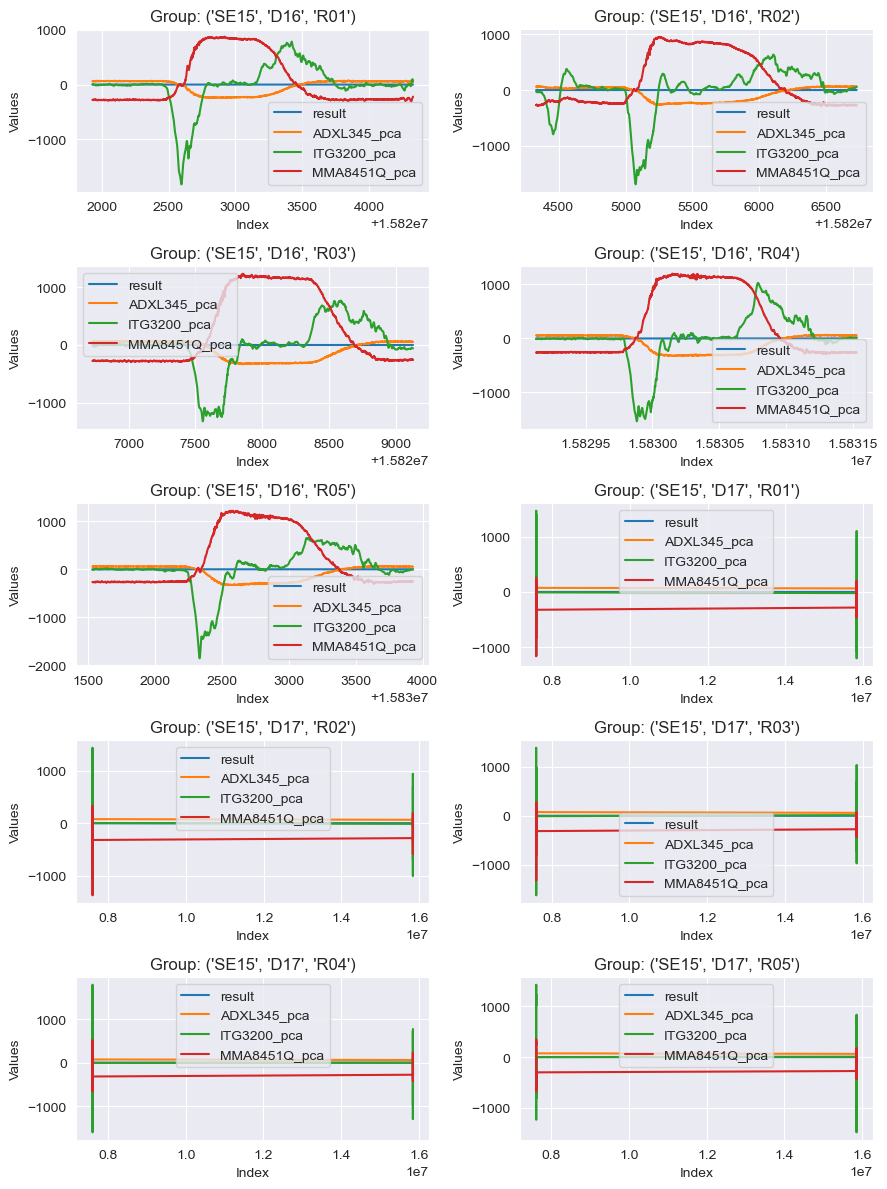

In [21]:
grouped_pca = df_pca.groupby(['subject', 'activity', 'trial'])
display_time_series_10(grouped_pca, True)

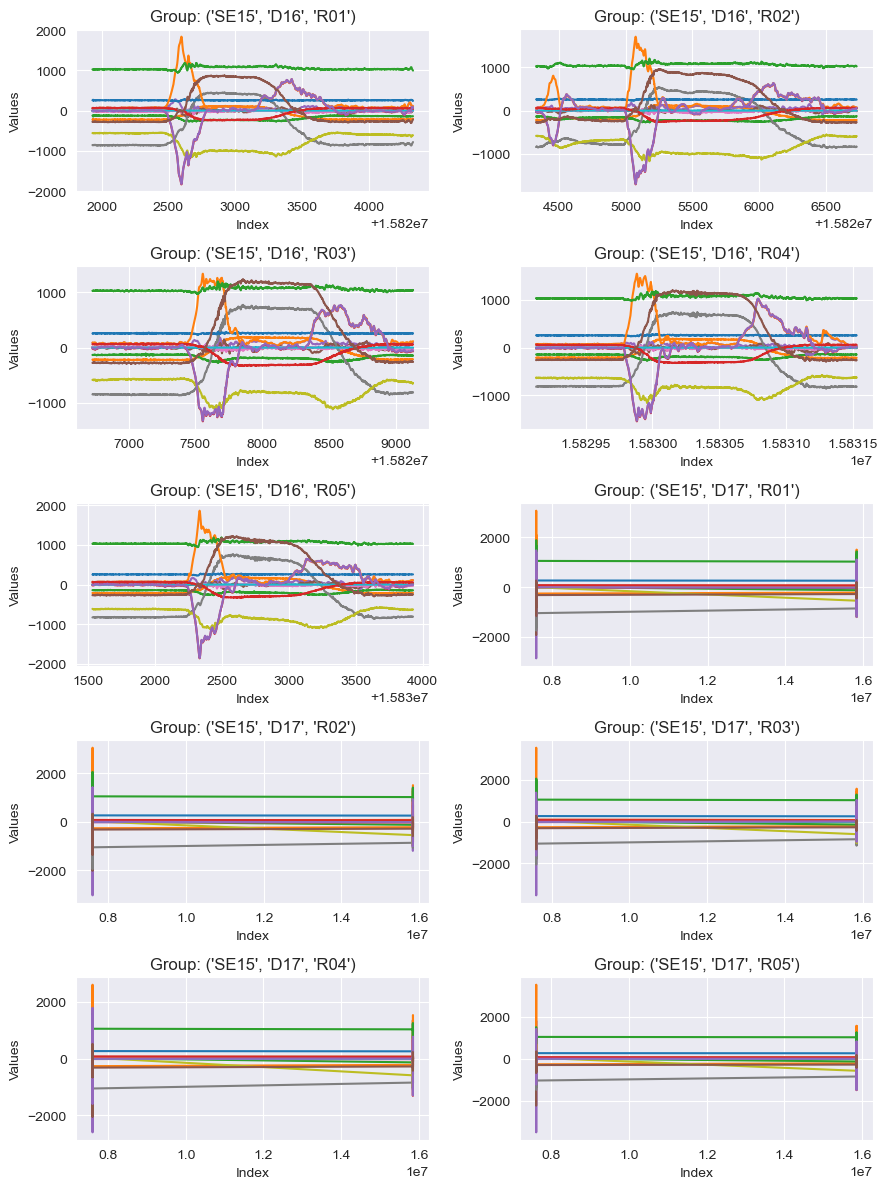

In [22]:
display_time_series_10(grouped, False)

When comparing the time series plots of original data to pca of each sensor and magnitude of each sensor, the pca results has preserved most of the details than the magnitudes. Therefore, from this point onwards the pca data of sensors will be used.

In [23]:
grouped.size()

subject  activity  trial
SA01     D01       R01      19999
         D02       R01      20000
         D03       R01      20000
         D04       R01      20000
         D05       R01       5000
                            ...  
SE15     D17       R01       9999
                   R02      10000
                   R03      10000
                   R04      10000
                   R05      10000
Length: 4500, dtype: int64

In the first few ADL where sensor readings have been recorded for 100s and 25s, The unnecessary rows can be trimmed if they are recursive. The first 6 groups are plotted below to identify the recursive data.

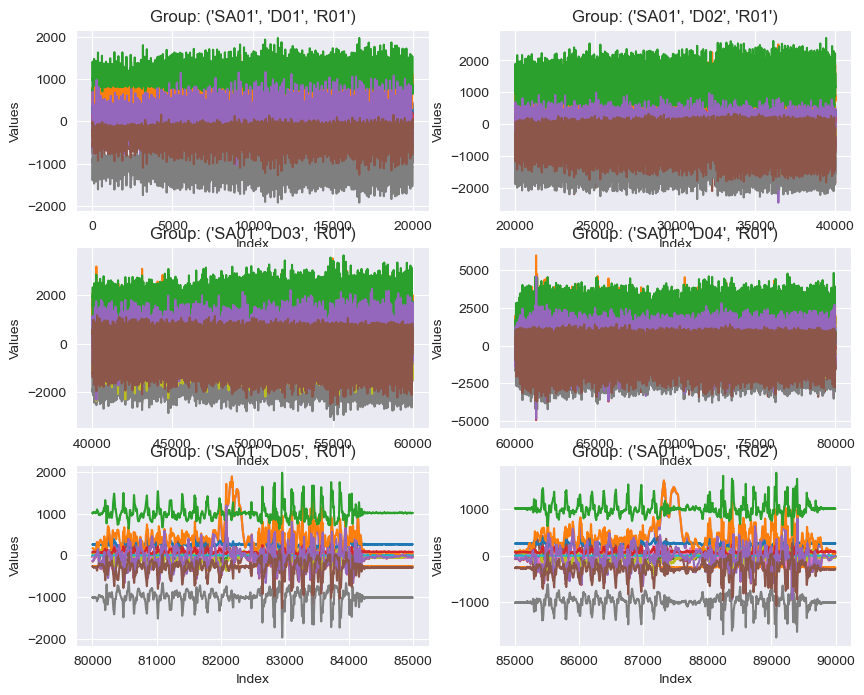

In [24]:
groups = list(grouped.groups.keys())[:6]
    
# Plot each group
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  
# Adjust grid size based on the number of plots
axes = axes.flatten()

for i, group_key in enumerate(groups):
    # Extract the group's data
    group_data = grouped.get_group(group_key)
    # Plot all columns except for the group identifiers
    group_data.drop(['subject', 'activity', 'trial'], axis=1, errors='ignore').plot(
        ax=axes[i], title=f"Group: {group_key}", legend=False
    )
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Values")

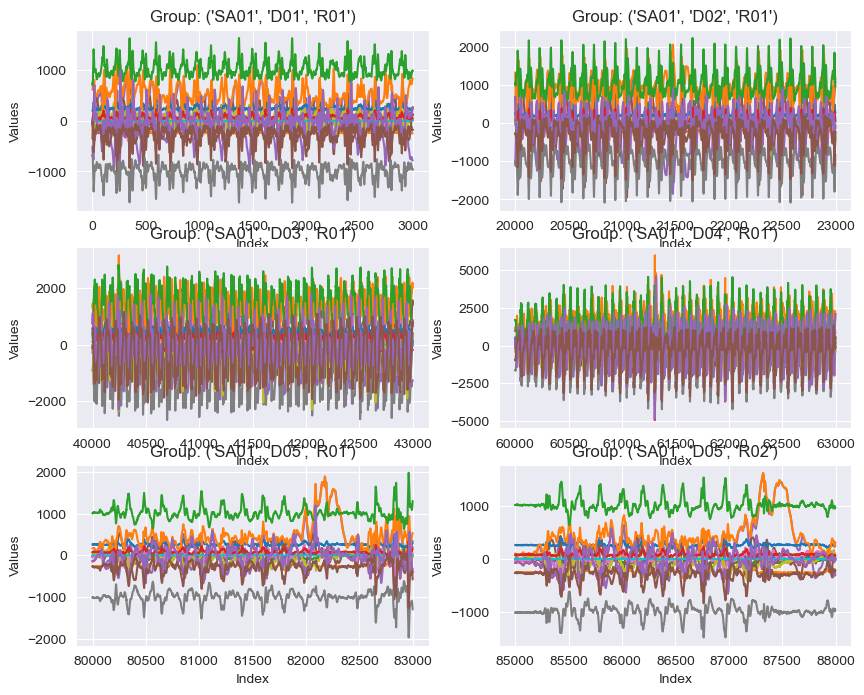

In [25]:
groups = list(grouped.groups.keys())[:6]
    
# Plot each group
fig, axes = plt.subplots(3, 2, figsize=(10, 8))  
# Adjust grid size based on the number of plots
axes = axes.flatten()

for i, group_key in enumerate(groups):
    # Extract the group's data
    group_data = grouped.get_group(group_key).iloc[:3000]
    # Plot all columns except for the group identifiers
    group_data.drop(['subject', 'activity', 'trial'], axis=1, errors='ignore').plot(
        ax=axes[i], title=f"Group: {group_key}", legend=False
    )
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Values")
    
# 15 seconds

In [ ]:
# Define the specific group keys you want to update
selected_keys = ["D01", "D02", "D03", "D04", "D06"]

# Filter groups to include only those matching the selected keys
groups_to_update = [group_key for group_key in grouped.groups.keys() if any(key in group_key for key in selected_keys)]

# Define the maximum number of rows to keep for each group
max_rows = 3000

# Iterate through the selected groups and update them
for group_key in groups_to_update:
    # Get the indices for the current group
    indices = grouped.groups[group_key]
    
    # Determine the rows to keep
    trimmed_indices = indices[:max_rows]
    
    # Update the DataFrame to retain only the trimmed indices for this group
    drop_indices = indices[max_rows:]  # Determine excess indices to drop
    df.drop(drop_indices, inplace=True)

# Recreate the grouped object with the updated DataFrame
grouped = df.groupby(['subject', 'activity', 'trial'])

# Optional: Check the size of groups to confirm updates
print(grouped.size())

In the first 4 activities (walking slowly, walking quickly, jogging slowly and jogging quickly) the dataset can be trimmed upto the first 15 seconds, because walking and jogging is a recursive actions hence the data look similar over time.

The next two activities 

1. walking upstairs and downstairs slowly
2. walking upstairs and downstairs quickly

when the original data is plotted, the middle set of data look a bit different (there is a change of the pattern)

This is because the activity is a combination of walking upstairs and downstairs, 

the middle part could be the change from one activity to the other (walk upstairs -> walk downstairs)

Due to the change of pattern of data in the middle, We cannot simply pick the first 15 seconds because then that turning point is at the latter part of the activity, this might result in giving out another meaning than the original which was walking upstairs and then downstairs.  

In that case we need to trim some data from the start and some from the end to get 15 seconds of data from the middle of data in order to preserve the activity insights.

In [26]:
def plot_ts(activityID, trimmed):
    # Filter groups where activity is 'D05' or 'D06'
    filtered_groups = [group for group in grouped.groups.keys() if activityID in group]
    
    # Select 10 random groups from the filtered list
    groups_to_plot = filtered_groups[:10]  # You can also sample 10 if the filtered list has more than 10 groups
    
    # Plot each group
    fig, axes = plt.subplots(5, 2, figsize=(10, 12))  # Adjust grid size to 5x2 for 10 plots
    axes = axes.flatten()
    
    for i, group_key in enumerate(groups_to_plot):
        group_data = None
        if trimmed:
            group_data = grouped.get_group(group_key).iloc[1000:4000]
        else:
            # Extract the group's data
            group_data = grouped.get_group(group_key)
        # Plot all columns except for the group identifiers
        group_data.drop(['subject', 'activity', 'trial'], axis=1, errors='ignore').plot(
            ax=axes[i], title=f"Group: {group_key}", legend=False
        )
        axes[i].set_xlabel("Index")
        axes[i].set_ylabel("Values")
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

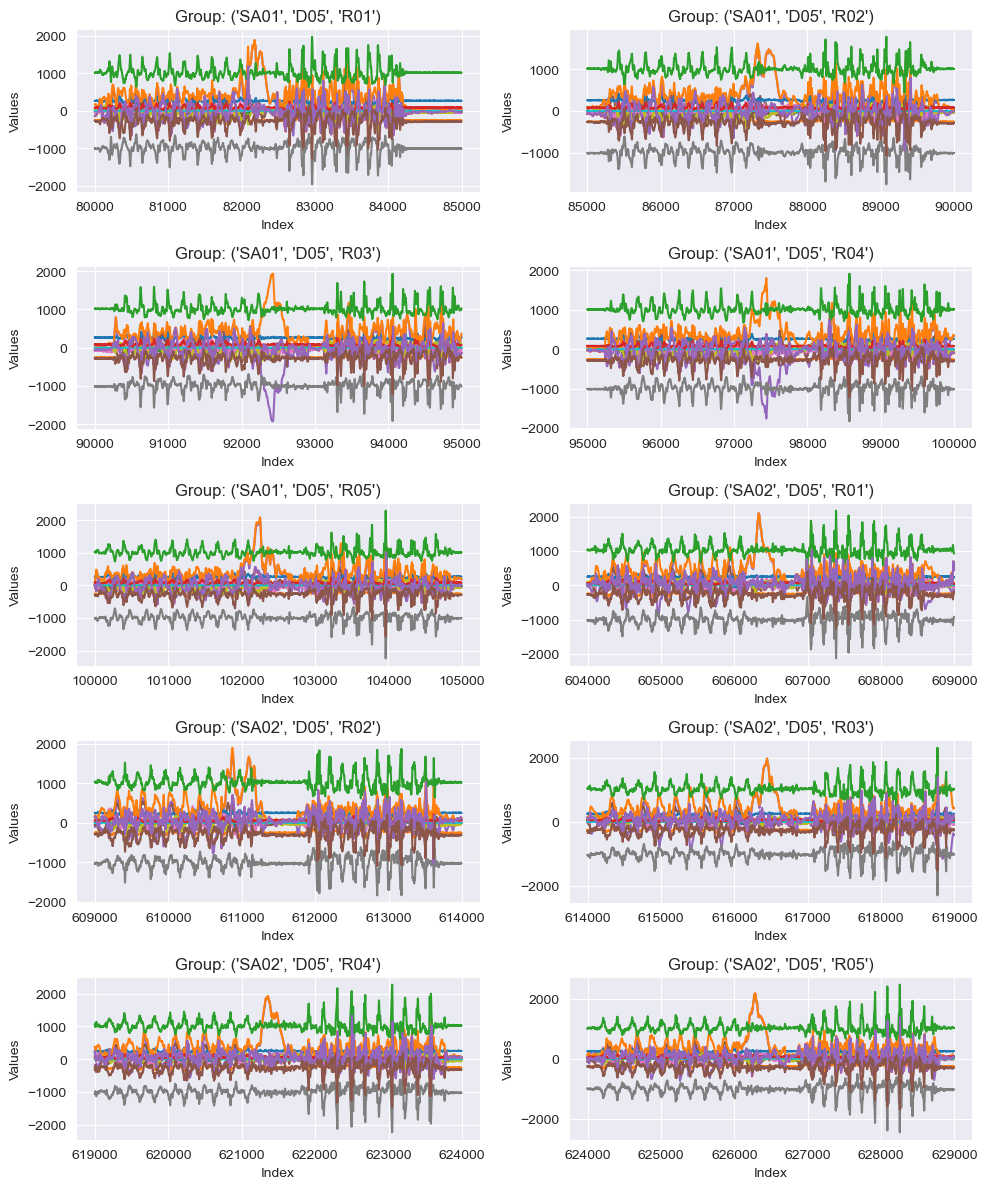

In [27]:
plot_ts("D05", False)
# 10 samples from Original Data - D05

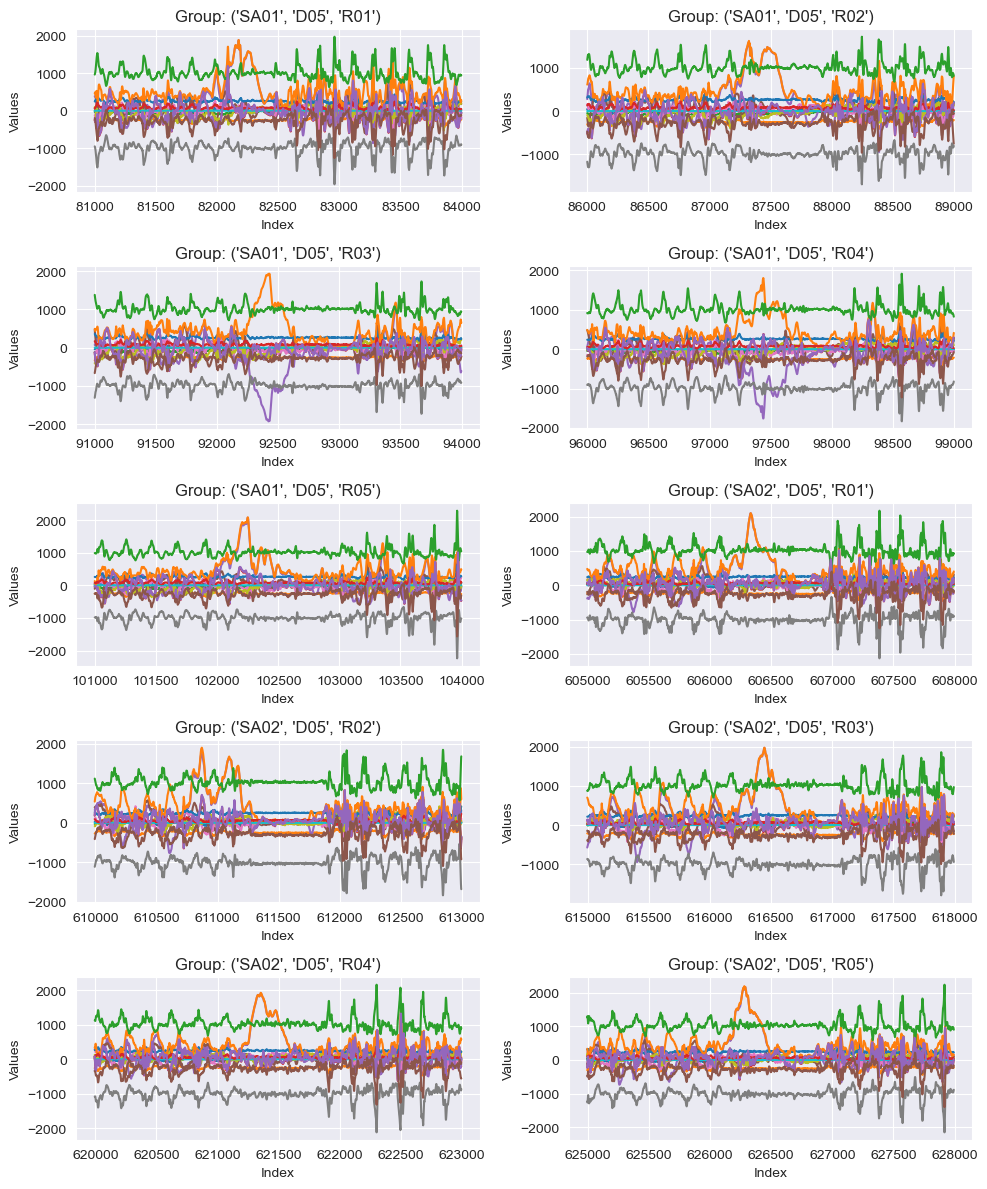

In [28]:
plot_ts("D05", True)
# 10 samples from trimmed data - D05

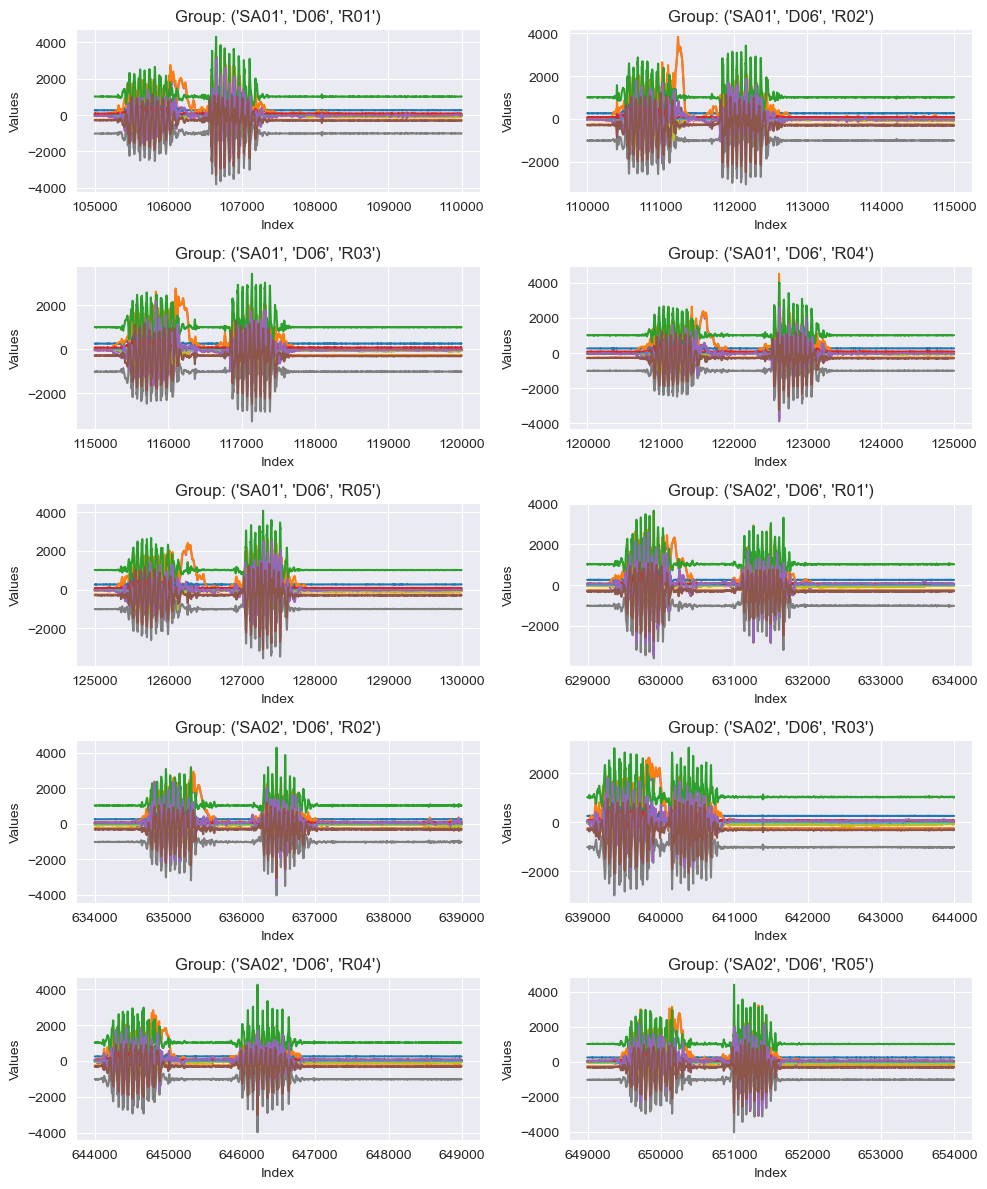

In [29]:
plot_ts("D06", False)
# 10 sampled from original data - D06

The D06 cannot be trimmed in the same way as D05, because the data has more information in the beginning than the end.

For that the 1st 15 seconds will be taken into account

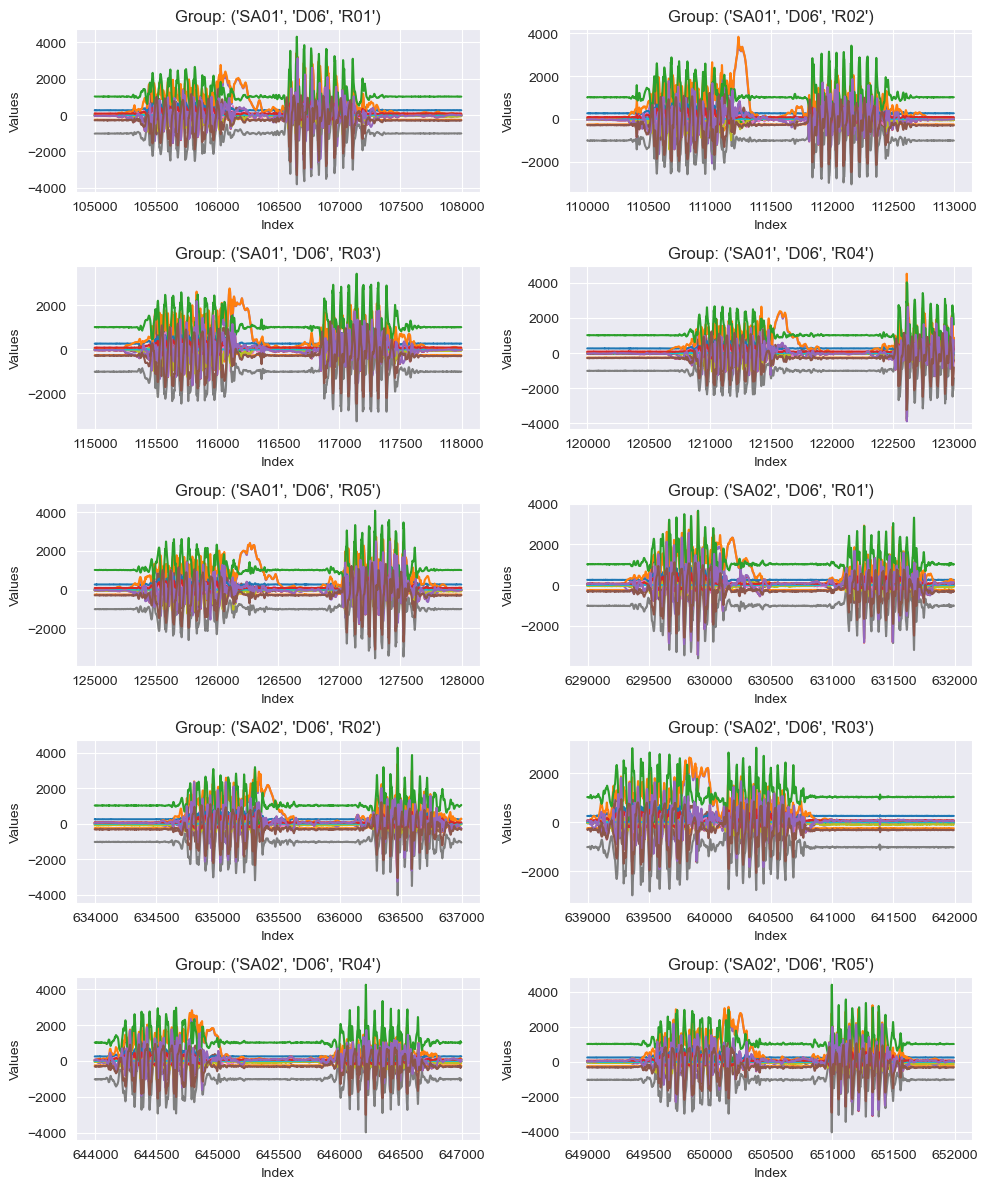

In [30]:
# Filter groups where activity is 'D06'
filtered_groups = [group for group in grouped.groups.keys() if 'D06' in group]

# Select 10 random groups from the filtered list
groups_to_plot = filtered_groups[:10]  # You can also sample 10 if the filtered list has more than 10 groups

# Plot each group
fig, axes = plt.subplots(5, 2, figsize=(10, 12))  # Adjust grid size to 5x2 for 10 plots
axes = axes.flatten()

for i, group_key in enumerate(groups_to_plot):
    # Extract the group's data
    group_data = grouped.get_group(group_key).iloc[:3000]
    # Plot all columns except for the group identifiers
    group_data.drop(['subject', 'activity', 'trial'], axis=1, errors='ignore').plot(
        ax=axes[i], title=f"Group: {group_key}", legend=False
    )
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Values")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The samples with more data than the others are trimmed according to above ways, in order to preserve the information in them.